# 时间基本处理

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)

plt.rc('figure', figsize=(12, 4))

In [2]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2019, 8, 19, 10, 30, 15, 980592)

In [3]:
now.year, now.month, now.day

(2019, 8, 19)

In [4]:
delta = datetime(2019, 1, 1) - datetime(2008, 1, 1, 23, 59)
delta

datetime.timedelta(4017, 60)

In [5]:
delta.days

4017

In [6]:
delta.seconds

60

In [7]:
from datetime import timedelta

start = datetime(2019, 1, 1)
start + timedelta(12)

datetime.datetime(2019, 1, 13, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2018, 12, 8, 0, 0)

# 字符串转日期

In [9]:
# 字符串转日期
stamp = datetime(2019, 1, 31)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2019-01-31'

In [10]:
value = '2019-01-31'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2019, 1, 31, 0, 0)

In [11]:
datestrs = ['8/1/2019', '9/1/2019']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2019, 8, 1, 0, 0), datetime.datetime(2019, 9, 1, 0, 0)]

In [12]:
from dateutil.parser import parse

parse('2019-01-31')

datetime.datetime(2019, 1, 31, 0, 0)

In [13]:
parse('Jan 31, 2019 11:15 PM')

datetime.datetime(2019, 1, 31, 23, 15)

In [14]:
parse('12/31/2019', dayfirst=True)

datetime.datetime(2019, 12, 31, 0, 0)

In [15]:
print(datestrs)
pd.to_datetime(datestrs)

['8/1/2019', '9/1/2019']


DatetimeIndex(['2019-08-01', '2019-09-01'], dtype='datetime64[ns]', freq=None)

In [16]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2019-08-01', '2019-09-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
idx[2]

NaT

In [18]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

# pands中的时间序列

In [19]:
from datetime import datetime

dates = [datetime(2019, 1, 2), datetime(2019, 1, 5), datetime(2019, 1, 7),
         datetime(2019, 1, 8), datetime(2019, 1, 10), datetime(2019, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2019-01-02    0.172000
2019-01-05   -0.424536
2019-01-07   -0.214663
2019-01-08   -0.645964
2019-01-10    0.231748
2019-01-12   -0.053887
dtype: float64

In [20]:
type(ts)

pandas.core.series.Series

In [21]:
ts.index

DatetimeIndex(['2019-01-02', '2019-01-05', '2019-01-07', '2019-01-08',
               '2019-01-10', '2019-01-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts + ts[::2]

2019-01-02    0.344000
2019-01-05         NaN
2019-01-07   -0.429325
2019-01-08         NaN
2019-01-10    0.463496
2019-01-12         NaN
dtype: float64

In [23]:
ts.index.dtype

dtype('<M8[ns]')

In [24]:
stamp = ts.index[0]
stamp

Timestamp('2019-01-02 00:00:00')

In [25]:
# 索引、选取与子集构造
stamp = ts.index[2]
ts[stamp]

-0.21466270986855687

In [26]:
# 月/日/年
ts['1/10/2019']

0.23174790203572407

In [27]:
# 年月日
ts['20190110']

0.23174790203572407

In [28]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.467172
2000-01-02    0.330990
2000-01-03    0.086903
2000-01-04    0.387555
2000-01-05    0.023073
2000-01-06    0.021846
                ...   
2002-09-21   -0.617661
2002-09-22   -0.284098
2002-09-23   -0.455775
2002-09-24   -1.401280
2002-09-25    0.372429
2002-09-26    1.501288
Freq: D, Length: 1000, dtype: float64

In [29]:
longer_ts['2001']

2001-01-01   -0.751282
2001-01-02    0.099974
2001-01-03   -1.698063
2001-01-04    0.408136
2001-01-05    0.827402
2001-01-06    0.410633
                ...   
2001-12-26    0.285561
2001-12-27   -0.554660
2001-12-28    0.484308
2001-12-29   -0.673601
2001-12-30   -0.797842
2001-12-31    0.988648
Freq: D, Length: 365, dtype: float64

In [30]:
longer_ts['2001-05']

2001-05-01   -0.801544
2001-05-02    0.642389
2001-05-03    0.164474
2001-05-04   -1.068225
2001-05-05    0.651158
2001-05-06    0.920398
                ...   
2001-05-26   -0.284613
2001-05-27   -0.176875
2001-05-28    0.318221
2001-05-29   -1.167438
2001-05-30    0.560262
2001-05-31   -0.250117
Freq: D, Length: 31, dtype: float64

In [31]:
ts

2019-01-02    0.172000
2019-01-05   -0.424536
2019-01-07   -0.214663
2019-01-08   -0.645964
2019-01-10    0.231748
2019-01-12   -0.053887
dtype: float64

In [32]:
ts[datetime(2019, 1, 7):]

2019-01-07   -0.214663
2019-01-08   -0.645964
2019-01-10    0.231748
2019-01-12   -0.053887
dtype: float64

In [33]:
# 截断 1/9/2019之后的数据
ts.truncate(after='1/9/2019')

2019-01-02    0.172000
2019-01-05   -0.424536
2019-01-07   -0.214663
2019-01-08   -0.645964
dtype: float64

In [34]:
# freq='W-WED' 是每周周三
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

data_range函数频率参数值

别名|	描述
--|--
B|	交易日
C|	自定义交易日（试验性）
D|	日历日
W|	每周
M|	每月底
BM|	每月最后一个交易日
MS|	月初
BMS|	每月第一个交易日
Q|	季度末
BQ|	每季度最后一个交易日
QS|	季度初
BQS|	每季度第一个交易日
A|	每年底
BA|	每年最后一个交易日
AS|	每年初
BAS|	每年第一个交易日
H|	每小时
T|	每分钟
S|	每秒
L|	毫秒
U|	微秒


In [35]:
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.782948,-0.890164,-0.028164,-0.493703
2000-01-12,-0.944077,0.896286,0.052383,-1.649585
2000-01-19,-3.143461,0.583063,1.952593,-1.034577
2000-01-26,1.002276,-0.390626,-1.275372,-1.293879
2000-02-02,-1.765939,-0.326712,0.209869,-1.566046
2000-02-09,-0.556474,0.854375,-2.278699,1.159897
...,...,...,...,...
2001-10-24,0.133905,-0.556946,-0.415174,-0.075620
2001-10-31,1.481011,0.176015,1.103585,0.221638
2001-11-07,-2.754221,0.000293,0.428568,-0.880257


In [36]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.670840,1.181421,-2.120271,1.729987
2001-05-09,-0.366307,0.215251,-0.720757,-0.473165
2001-05-16,0.676114,-0.008594,2.091617,-0.759926
2001-05-23,0.275334,0.030045,-0.267771,0.056039
2001-05-30,-0.171642,-1.135467,-0.534345,2.050312


In [37]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [38]:
dup_ts.index.is_unique

False

In [39]:
dup_ts['1/3/2000']

4

In [40]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [41]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [42]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 日期范围、频率与移动

In [43]:
ts

2019-01-02    0.172000
2019-01-05   -0.424536
2019-01-07   -0.214663
2019-01-08   -0.645964
2019-01-10    0.231748
2019-01-12   -0.053887
dtype: float64

In [44]:
ts.resample('D').mean()

2019-01-02    0.172000
2019-01-03         NaN
2019-01-04         NaN
2019-01-05   -0.424536
2019-01-06         NaN
2019-01-07   -0.214663
2019-01-08   -0.645964
2019-01-09         NaN
2019-01-10    0.231748
2019-01-11         NaN
2019-01-12   -0.053887
Freq: D, dtype: float64

In [45]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [46]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [48]:
# B(business daily) ,M 月的最后一天
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [49]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [51]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [52]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [53]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [54]:
Hour(2) + Minute(30)

<150 * Minutes>

In [55]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [56]:
# freq='WOM-3FRI' 每个月第三个周五
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [57]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.598434
2000-02-29    0.105109
2000-03-31   -0.271298
2000-04-30    0.060423
Freq: M, dtype: float64

In [58]:
# 时间不变 ，数据向下错位
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.598434
2000-04-30    0.105109
Freq: M, dtype: float64

In [59]:
ts.shift(-2)

2000-01-31   -0.271298
2000-02-29    0.060423
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [60]:
# 求增长率
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.824359
2000-03-31   -3.581107
2000-04-30   -1.222718
Freq: M, dtype: float64

In [61]:
# 数据不变，时间大小变化
ts.shift(2, freq='M')

2000-03-31    0.598434
2000-04-30    0.105109
2000-05-31   -0.271298
2000-06-30    0.060423
Freq: M, dtype: float64

In [62]:
# 下移3天
ts.shift(3, freq='D')

2000-02-03    0.598434
2000-03-03    0.105109
2000-04-03   -0.271298
2000-05-03    0.060423
dtype: float64

In [63]:
# 下移3天
ts.shift(1, freq='3D')

2000-02-03    0.598434
2000-03-03    0.105109
2000-04-03   -0.271298
2000-05-03    0.060423
dtype: float64

In [64]:
# 下移90分钟
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.598434
2000-02-29 01:30:00    0.105109
2000-03-31 01:30:00   -0.271298
2000-04-30 01:30:00    0.060423
Freq: M, dtype: float64

In [65]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2019, 8, 18)
now + 3 * Day()

Timestamp('2019-08-21 00:00:00')

In [66]:
now + MonthEnd()

Timestamp('2019-08-31 00:00:00')

In [67]:
now + MonthEnd(2)

Timestamp('2019-09-30 00:00:00')

In [68]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2019-08-31 00:00:00')

In [69]:
offset.rollback(now)

Timestamp('2019-07-31 00:00:00')

In [70]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.832137
2000-01-19   -1.423202
2000-01-23   -1.543921
2000-01-27   -0.045328
2000-01-31   -0.073373
2000-02-04    0.824774
                ...   
2000-03-11   -1.036641
2000-03-15    1.660434
2000-03-19    0.080479
2000-03-23    0.269037
2000-03-27    0.842363
2000-03-31   -1.380433
Freq: 4D, Length: 20, dtype: float64

In [71]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.783592
2000-02-29    0.365774
2000-03-31   -0.038601
dtype: float64

In [72]:
ts.resample('M').mean()

2000-01-31   -0.783592
2000-02-29    0.365774
2000-03-31   -0.038601
Freq: M, dtype: float64

# 时间序列可视化

In [73]:
close_px_all = pd.read_csv('data/stock_px.csv', parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [74]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [75]:
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


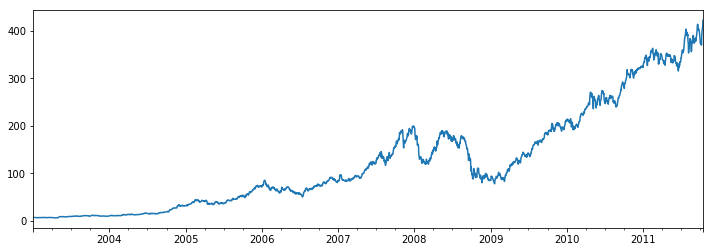

In [76]:
close_px['AAPL'].plot()

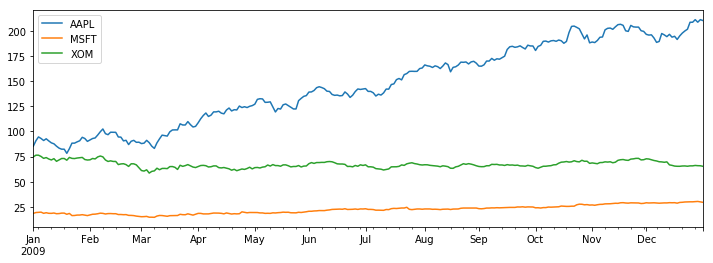

In [77]:
close_px.loc['2009'].plot()

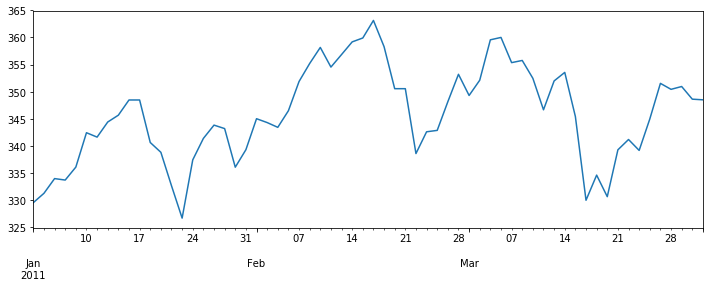

In [78]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

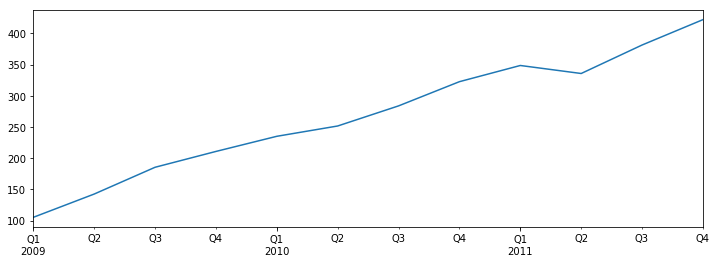

In [79]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()

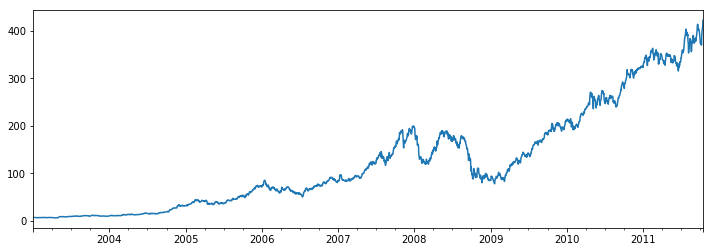

In [80]:
close_px = close_px.asfreq('B').fillna(method='ffill').ffill()
close_px.AAPL.plot()

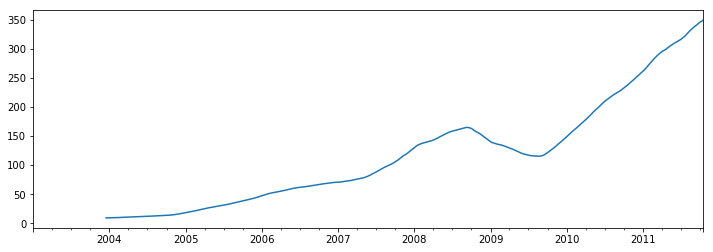

In [81]:
close_px.AAPL.rolling(250).mean().plot()

In [82]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

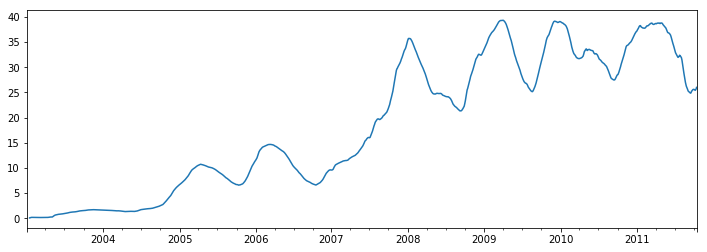

In [83]:
appl_std250.plot()

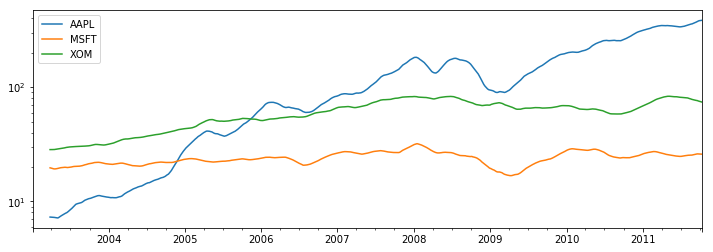

In [84]:
close_px.rolling(60).mean().plot(logy=True)

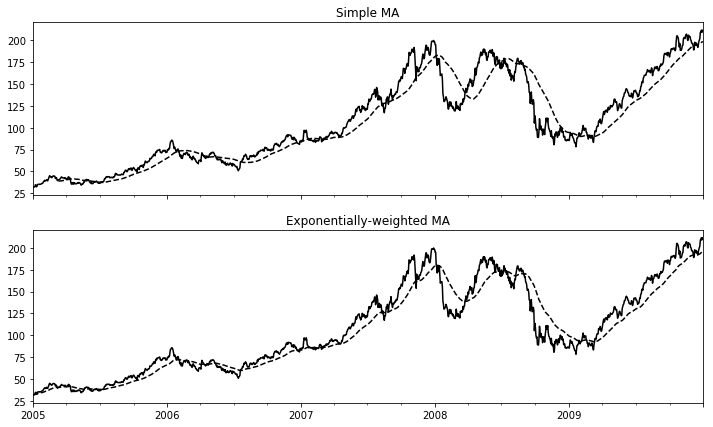

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(60, min_periods=50).mean()
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [86]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [87]:
# 标普500指数
spx_px = close_px_all['SPX']
spx_px.head()

2003-01-02    909.03
2003-01-03    908.59
2003-01-06    929.01
2003-01-07    922.93
2003-01-08    909.93
Name: SPX, dtype: float64

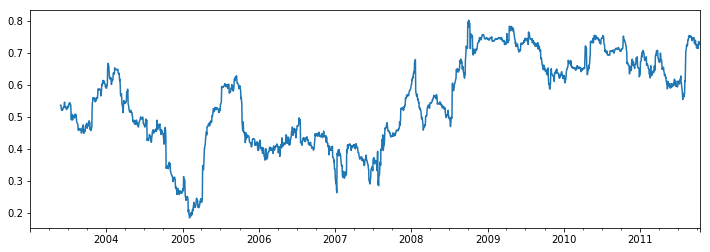

In [88]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
# 苹果股票和标普500指数的相关系数
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

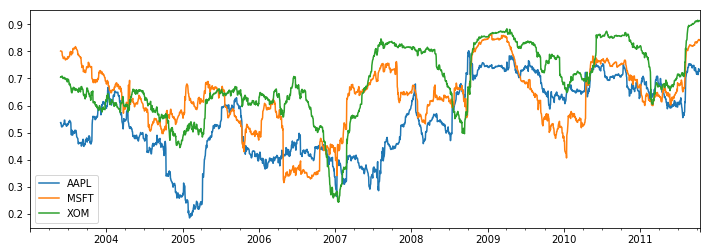

In [89]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

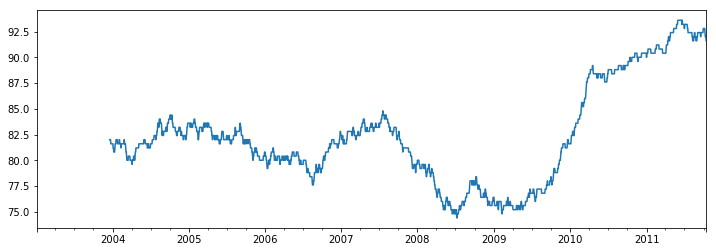

In [90]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

# 时间序列案例分析

## 参数初始化

In [91]:
discfile = 'data/arima_data.xls'
forecastnum = 5

# 读取数据，指定日期列为指标，Pandas自动将“日期”列识别为Datetime格式
data = pd.read_excel(discfile, index_col=u'日期')
data = pd.DataFrame(data, dtype=np.float64)
data

,销量
日期,
2015-01-01,3023.0
2015-01-02,3039.0
2015-01-03,3056.0
2015-01-04,3138.0
2015-01-05,3188.0
2015-01-06,3224.0
...,...
2015-02-01,4210.0
2015-02-02,4493.0


## 时序图

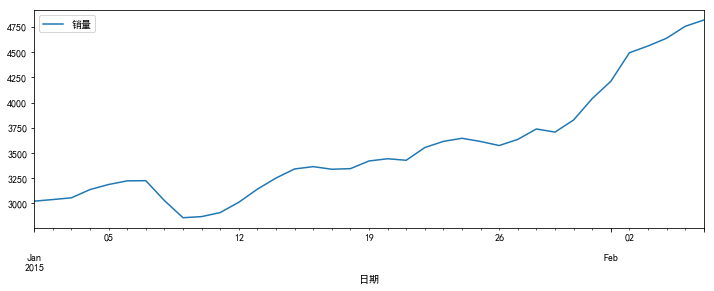

In [92]:
# 时序图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
data.plot()

## 自相关图

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


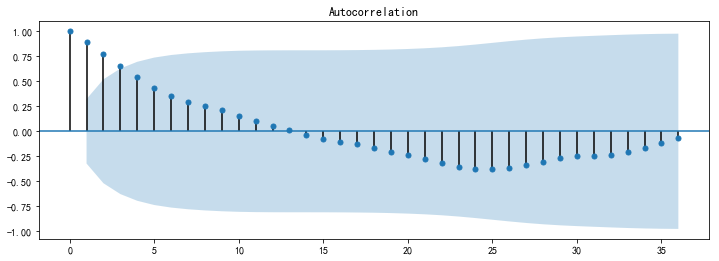

In [93]:
# 自相关图
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data).show()

## 平稳性检测

In [94]:
# 平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF

ADF(data[u'销量'])
# 返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore


(1.8137710150945274,
 0.99837594215142644,
 10,
 26,
 {'1%': -3.7112123008648155,
  '10%': -2.6300945562130176,
  '5%': -2.9812468047337282},
 299.46989866024177)

pvalue=0.99837594215142644，足够大，不能拒绝原假设（数据非平稳），所以数据是非平稳的。

下面尝试做一下差分：

## 差分后的结果

In [95]:
# 差分后的结果
D_data = data.diff().dropna()
D_data.columns = [u'销量差分']
D_data

,销量差分
日期,
2015-01-02,16.0
2015-01-03,17.0
2015-01-04,82.0
2015-01-05,50.0
2015-01-06,36.0
2015-01-07,2.0
...,...
2015-02-01,171.0
2015-02-02,283.0


## 时序图

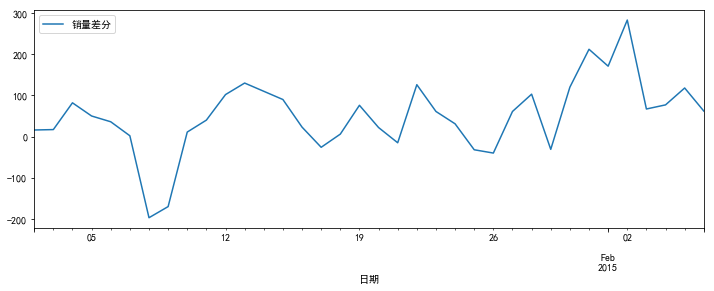

In [96]:
D_data.plot()  # 时序图

## 自相关图

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


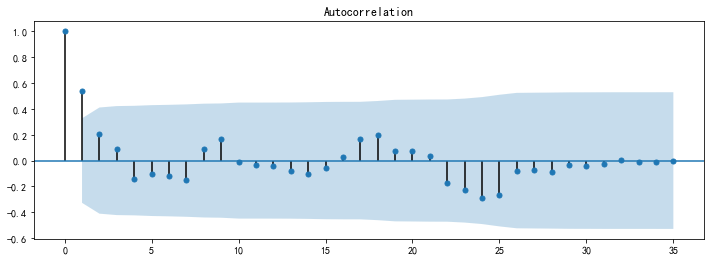

In [97]:
plot_acf(D_data).show()  # 自相关图

## 偏自相关图

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


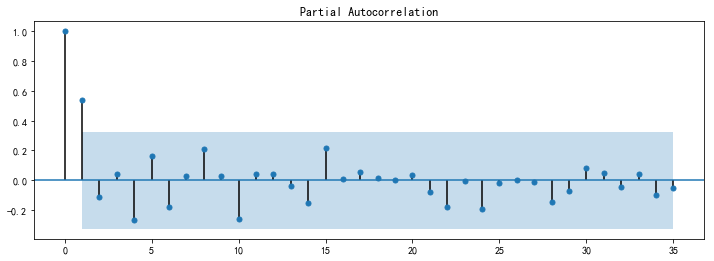

In [98]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(D_data).show()  # 偏自相关图

## 平稳性检测

In [99]:
ADF(D_data[u'销量差分'])  # 平稳性检测

(-3.1560562366723537,
 0.022673435440048798,
 0,
 35,
 {'1%': -3.6327426647230316,
  '10%': -2.6130173469387756,
  '5%': -2.9485102040816327},
 287.59090907803341)

pvalue=0.022673435440048798，足够小，能拒绝原假设（数据非平稳），可以认为数据是平稳的。继续向下检验：

## 白噪声检验

In [100]:
# 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(D_data, lags=1)  # 返回统计量和p值

(array([ 11.304]), array([ 0.0008]))

pvalue=0.0008，足够小，可以认为数据不是白噪声，继续：

## 建立ARIMA模型（差分整合移动平均自回归模型）

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 定阶
pmax = int(len(D_data) / 10)  # 一般阶数不超过length/10
qmax = int(len(D_data) / 10)  # 一般阶数不超过length/10
bic_matrix = []  # bic矩阵
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:  # 存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(data, (p, 1, q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

In [102]:
bic_matrix = pd.DataFrame(bic_matrix)  # 从中可以找出最小值
bic_matrix

,0,1,2,3
0,432.068472,422.510082,426.088911,426.595507
1,423.628276,426.073601,NaN,NaN
2,426.774824,427.395821,NaN,NaN
3,430.317524,NaN,NaN,436.478109


In [103]:
p, q = bic_matrix.stack().idxmin()  # 先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' % (p, q))

BIC最小的p值和q值为：0、1


In [104]:
model = ARIMA(data, (0, 1, 1)).fit()  # 建立ARIMA(0, 1, 1)模型

## 给出模型报告

In [105]:
model.summary()  # 给出一份模型报告

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.销量   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -205.880
Method:                       css-mle   S.D. of innovations             73.086
Date:                Mon, 19 Aug 2019   AIC                            417.760
Time:                        10:31:54   BIC                            422.510
Sample:                    01-02-2015   HQIC                           419.418
                         - 02-06-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9564     20.139      2.481      0.018      10.485      89.428
ma.L1.D.销量     0.6710      0.165      4.071      0.000       0.348       0.994
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4902           +0.0000j            1.4902            0.5000
-----------------------------------------------------------------------------
"""

## 预测

In [106]:
model.forecast(5)  # 作为期5天的预测，返回预测结果、标准误差、置信区间。

(array([ 4873.9667,  4923.9232,  4973.8796,  5023.836 ,  5073.7925]),
 array([  73.0857,  142.3268,  187.5428,  223.8028,  254.957 ]),
 array([[ 4730.7213,  5017.2122],
        [ 4644.9678,  5202.8786],
        [ 4606.3024,  5341.4568],
        [ 4585.1906,  5462.4815],
        [ 4574.0858,  5573.4991]]))

参考资料：炼数成金Python数据分析课程